In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

fs = 100 # Sampling frequency (Hz) for all signals.

In [2]:
def plotwave(tw, wave, s):
    Nw = len(tw)
    Ns = len(s)
    
    plt.figure(figsize=1.4*plt.figaspect(0.5))    
    for i,a in enumerate(s):
        ax = plt.subplot(2,Ns,i+1)
        ax.plot(tw, wave(Nw,a),'.-')
        ax.set_ylim(-0.6, 0.8)
        ax.set_title('scale = %d' % a)

    plt.tight_layout()

In [3]:
# Try to get the correct signature to fit scipy.signal.cwt.
def morlet(n, a):
    return sig.morlet(n, s=a)

/Users/jonathangodbout/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


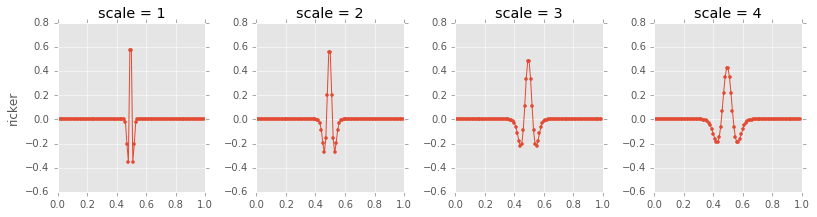

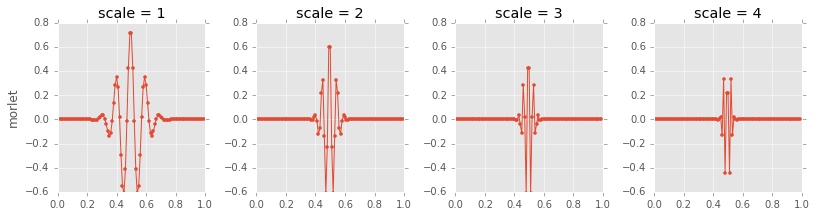

In [4]:
Tw = 1                 # Wavelet signal period (s)
Nw = Tw*fs             # Number of samples (-)
tw = np.arange(Nw)/fs  # Time vector (s)

s = np.arange(1,5) # Scales to test
Ns = len(s)

plotwave(tw, sig.ricker, s)
plt.subplot(2,Ns,1).set_ylabel('ricker')

plotwave(tw, morlet, s)
plt.subplot(2,Ns,1).set_ylabel('morlet')

## Ok it is a PITA to run Morlet wavelets using the scipy.signal.morlet. It does not fit the scipy.signal.cwt signature (like scipy.signal.ricker) and anyway scipy.signal.cwt does not seem to support complex values (what is why Morlet is cool).

## Maybe the best bet is to use something like the mlpy package, but it does not seem to be included by default with the Anaconda distribution.

In [5]:
T = 10                     # Signal period (s)
N = T*fs                   # Number of samples (-)
t = np.arange(N)/fs        # Time vector (s)

x = np.zeros(len(t))
x = x + np.sin(2*np.pi*t*  4)   #  4 Hz sin component
x = x + np.sin(2*np.pi*t*  9)   #  9 Hz sin component
x = x + np.sin(2*np.pi*t* 13)   # 13 Hz sin component

In [6]:
s = np.arange(0.1,20,0.05) # Scales 
c = sig.cwt(x, sig.ricker, s)

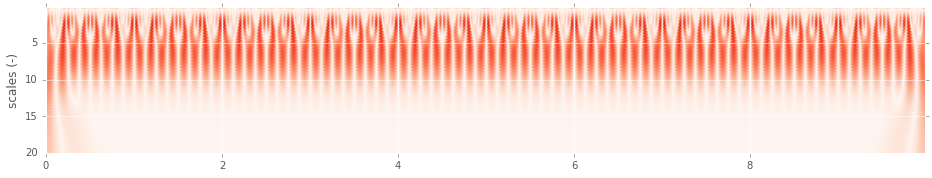

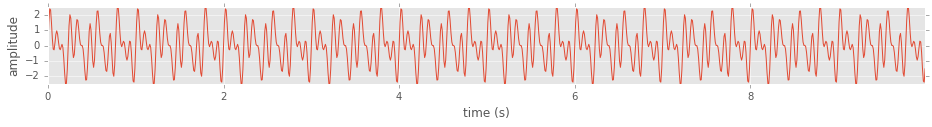

In [9]:
plt.figure(figsize=0.8*plt.figaspect(0.2))
plt.imshow(np.abs(c), extent=(t[0], t[-1], s[-1], s[0]), cmap=plt.cm.Reds)
plt.axis('tight')
plt.tight_layout()
plt.ylabel('scales (-)')

plt.figure(figsize=0.8*plt.figaspect(0.1))
plt.plot(t,x)
plt.axis('tight')
plt.tight_layout()
plt.xlabel('time (s)')
plt.ylabel('amplitude')